<a href="https://colab.research.google.com/github/mahmoudradwaan98/hello-world/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [ ]:
iris= datasets.load_iris()

In [ ]:
X,y =iris.data, iris.target

In [ ]:
X2d = iris.data[:,[2,3]]

Text(0, 0.5, 'Petal width')

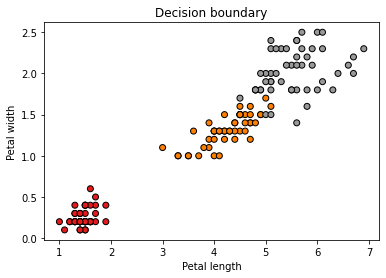

In [ ]:
plt.scatter(X2d[:,0],X2d[:,1],c=y,cmap=cm,edgecolors='k',alpha=1)
plt.title('Decision boundary')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


In [ ]:
nb= GaussianNB()
nb.fit(X2d,y)
yPred= nb.predict(X2d)

In [ ]:
# this function can be used to plot the decision boundary
def plotDecisionBoundary( X, y, model, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)

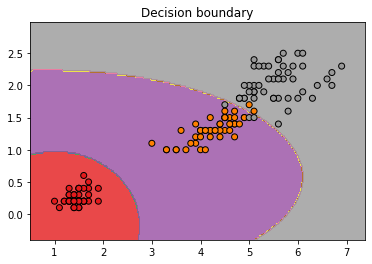

In [ ]:
# plot the decision boundary 
plotDecisionBoundary(X2d,y,model=nb,title='Decision boundary')

In [ ]:
def plot3dProb(
        X,
        model,
        title='',
):
    plt.close('all')
    plt.figure()
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.zaxis.set_tick_params(labelsize=10)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    for index in [0, 1, 2]:
        zz = Z[:, index].reshape(xx.shape)
        ax.plot_surface(xx, yy, zz, label=f'Class {index}', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('petal length')
    ax.set_ylabel('petal width')
    ax.set_zlabel('probability')


<Figure size 432x288 with 0 Axes>

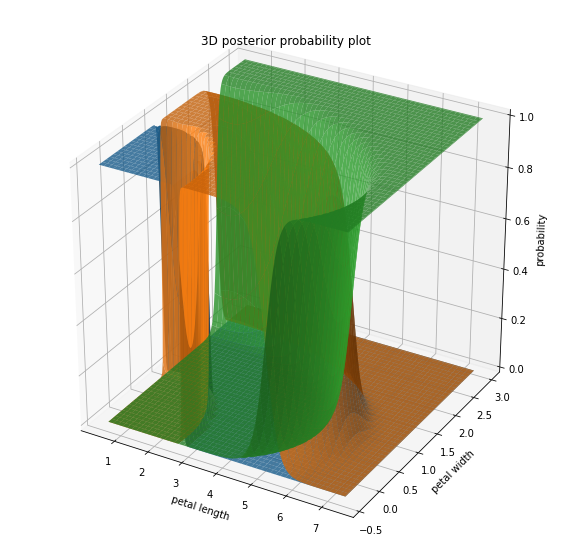

In [ ]:
plot3dProb(X2d,nb,title='3D posterior probability plot')